In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from imutils import paths
import seaborn as sns
import random
import time
from datetime import datetime
import os

In [2]:
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
bboxes = pd.read_csv('./archive/bboxes.csv')

In [4]:
bboxes.head()

,443_png_jpg.rf.76a9b2e007453a66c8ffd722dbc009fd.jpg,340,301,408,385,hill_mustard
0,443_png_jpg.rf.76a9b2e007453a66c8ffd722dbc009f...,45,60,101,135,hill_mustard
1,443_png_jpg.rf.76a9b2e007453a66c8ffd722dbc009f...,0,84,55,168,hill_mustard
2,443_png_jpg.rf.76a9b2e007453a66c8ffd722dbc009f...,371,62,414,146,hill_mustard
3,443_png_jpg.rf.76a9b2e007453a66c8ffd722dbc009f...,327,22,385,97,hill_mustard
4,---------------------197_jpg.rf.76bee11dd0c1c8...,148,124,342,406,fireweed


In [5]:
bboxes = pd.DataFrame(np.insert(bboxes.values , 0, values=bboxes.columns, axis= 0 ))
bboxes.columns = ['pollen_name', 'a', 'b', 'c', 'd', 'pollen_type']
bboxes.head()

,pollen_name,a,b,c,d,pollen_type
0,443_png_jpg.rf.76a9b2e007453a66c8ffd722dbc009f...,340,301,408,385,hill_mustard
1,443_png_jpg.rf.76a9b2e007453a66c8ffd722dbc009f...,45,60,101,135,hill_mustard
2,443_png_jpg.rf.76a9b2e007453a66c8ffd722dbc009f...,0,84,55,168,hill_mustard
3,443_png_jpg.rf.76a9b2e007453a66c8ffd722dbc009f...,371,62,414,146,hill_mustard
4,443_png_jpg.rf.76a9b2e007453a66c8ffd722dbc009f...,327,22,385,97,hill_mustard


In [6]:
class_map = pd.read_csv('./archive/class_map.csv')

In [7]:
class_map.head(15)

,buckwheat,0
0,clover,1
1,angelica,2
2,angelica_garden,3
3,willow,4
4,hill_mustard,5
5,linden,6
6,meadow_pink,7
7,alder,8
8,birch,9
9,fireweed,10


In [8]:
class_map = pd.DataFrame(np.insert(class_map.values , 0, values=class_map.columns, axis= 0 ))
class_map.columns = ['pollen_type-name', 'pollen_num']
class_map.head()

,pollen_type-name,pollen_num
0,buckwheat,0
1,clover,1
2,angelica,2
3,angelica_garden,3
4,willow,4


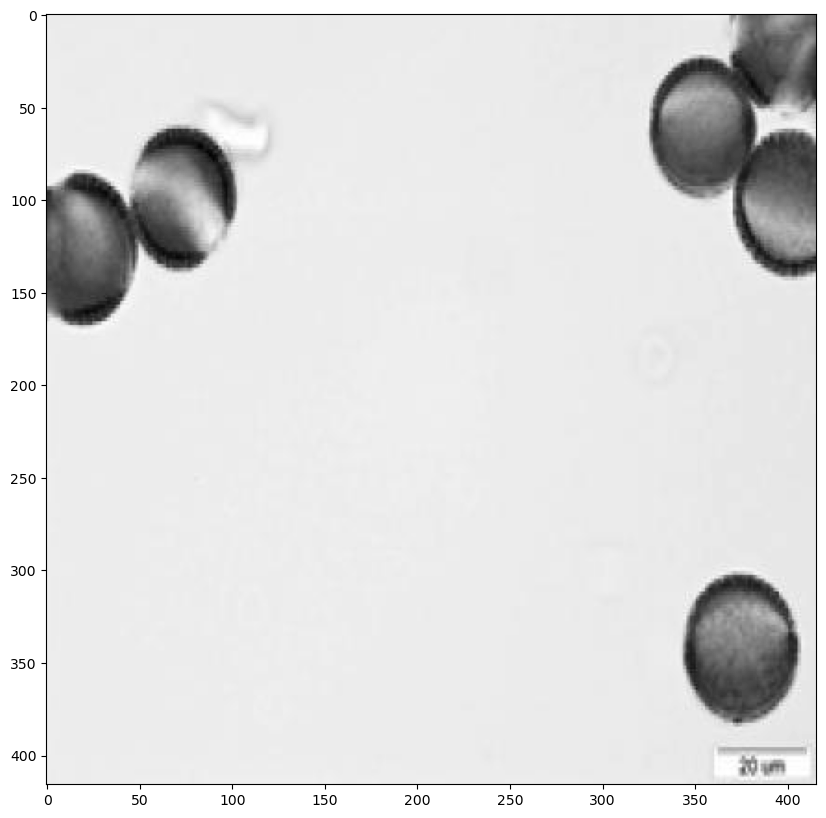

In [9]:
sample_image = cv2.imread('./archive/images/443_png_jpg.rf.76a9b2e007453a66c8ffd722dbc009fd.jpg')
image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,10)) 
plt.imshow(image, cmap = 'gray')
plt.show()

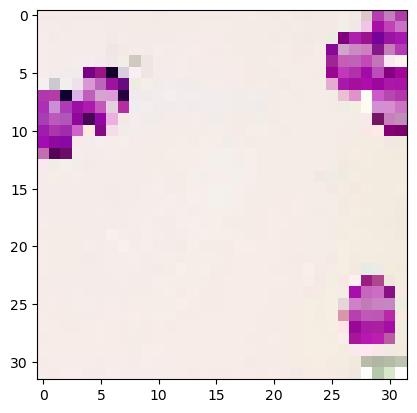

In [10]:
sample_image = cv2.resize(sample_image, (32, 32))
plt.imshow(sample_image, cmap = 'gray')
plt.show()

In [11]:
pixels = sample_image.flatten()
pixels

array([244, 235, 232, ..., 255, 253, 254], dtype=uint8)

Repeat the process above for all images

In [12]:
image_paths = list(paths.list_images('./archive/images'))
train_images = []
train_labels = []

In [13]:
img = image_paths[0].replace("./archive/images\\", '')
ptype = bboxes[bboxes["pollen_name"] == img]["pollen_type"].values[0]
pnum = class_map[class_map["pollen_type-name"] == ptype]["pollen_num"].values[0]

In [14]:
for (i, image_path) in enumerate(image_paths):
    ""
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)    
    image = cv2.resize(image, (32, 32))
    
    pixels = image.flatten()
    
    train_images.append(pixels)
    
    img = image_paths[i].replace("./archive/images\\", '')
    print(img)
    ptype = bboxes[bboxes["pollen_name"] == img]["pollen_type"].values[0]
    print(ptype)
    pnum = class_map[class_map["pollen_type-name"] == ptype]["pollen_num"].values[0]
    print(pnum)
    print(f"----{i}-----")
    
    train_labels.append(pnum)

---------------------100_jpg.rf.93077deff26c9ada1149c33c74da96b9.jpg
fireweed
10
----0-----
---------------------101_jpg.rf.3b026d04c8904e6183296ca962709bf8.jpg
fireweed
10
----1-----
---------------------102_jpg.rf.22469e4957a2107f673d8b0ba17f1190.jpg
fireweed
10
----2-----
---------------------103_jpg.rf.71e0ee12c814d46913c06ce56b66549b.jpg
fireweed
10
----3-----
---------------------104_jpg.rf.e754f235c33218253fe3d659fc96491a.jpg
fireweed
10
----4-----
---------------------105_jpg.rf.2a6beb96e370ba69ffa2c33db4783fce.jpg
fireweed
10
----5-----
---------------------106_jpg.rf.b509bf1275ffa9bc864f86fa327c815b.jpg
fireweed
10
----6-----
---------------------107_jpg.rf.146c8ce61d966b9a20ac7fabcb4c66e6.jpg
fireweed
10
----7-----
---------------------108_jpg.rf.69f4d7c0c24cdeb80abc12149174c1c4.jpg
fireweed
10
----8-----
---------------------109_jpg.rf.e83665236612950cb0e0cfee79f9499f.jpg
fireweed
10
----9-----
---------------------110_jpg.rf.1854b2038579f02eb2e42349667db481.jpg
fireweed
10

--------------------112_jpg.rf.94ff4e6618a5e59eff12806b591785b3.jpg
angelica_garden
3
----124-----
--------------------113_jpg.rf.14289e5ca9f796908f21dd65d116f736.jpg
hill_mustard
5
----125-----
--------------------113_jpg.rf.868922f9fa2d1c398dccb16e4b75f13c.jpg
angelica_garden
3
----126-----
--------------------114_jpg.rf.c0270400d2e3a4bf37eb0f228ba2382d.jpg
hill_mustard
5
----127-----
--------------------114_jpg.rf.cb8af897abf469ba52ba3e2a7533dbcd.jpg
angelica_garden
3
----128-----
--------------------115_jpg.rf.23b56a3abc7c4a855ca3b7543f644617.jpg
hill_mustard
5
----129-----
--------------------115_jpg.rf.9dcbf3ea69e741830abf2fcad4a06f47.jpg
angelica_garden
3
----130-----
--------------------116_jpg.rf.1394f32f312d416b395e98daa02adfb8.jpg
angelica_garden
3
----131-----
--------------------116_jpg.rf.60367f71d2244530372867562f452e6a.jpg
hill_mustard
5
----132-----
--------------------117_jpg.rf.1559b73bc7c3b708d393c76cec0842bf.jpg
angelica_garden
3
----133-----
--------------------11

--------------------180_jpg.rf.169380b293a40d1e426903bc6e5d7708.jpg
angelica_garden
3
----256-----
--------------------180_jpg.rf.a8527e7c91c9335fca87c1d94768ac00.jpg
hill_mustard
5
----257-----
--------------------181_jpg.rf.bfb7fb16b2616ac02f899a4f270cdd97.jpg
hill_mustard
5
----258-----
--------------------181_jpg.rf.e1a8135ef42fb28dc8d8fed12e5907e0.jpg
angelica_garden
3
----259-----
--------------------182_jpg.rf.67c6d6329bf26debd30e3c69d991abbf.jpg
hill_mustard
5
----260-----
--------------------182_jpg.rf.849175899d6e4d32e163e56699bf80b8.jpg
angelica_garden
3
----261-----
--------------------183_jpg.rf.9325455ebf1a60b17c5885b6d70e6a92.jpg
angelica_garden
3
----262-----
--------------------183_jpg.rf.a3075e2734d33c51a644421060ccdc46.jpg
hill_mustard
5
----263-----
--------------------184_jpg.rf.f06fadeabe611ba670bccba2509fe296.jpg
angelica_garden
3
----264-----
--------------------185_jpg.rf.fdaaafcc3ddd7e4df2df5b66cb6ae539.jpg
hill_mustard
5
----265-----
--------------------186_j

------------------148_jpg.rf.e282ac655eacc1e25fc93b589945cdbb.jpg
buckwheat
0
----391-----
------------------149_jpg.rf.44e82c5ac43ae653a76591d502f18b96.jpg
buckwheat
0
----392-----
------------------149_jpg.rf.f719a2489fcc6a70d9cf840b65439b0c.jpg
meadow_pink
7
----393-----
------------------150_jpg.rf.9b0092b05c3d2e83da001d3a0200ec5b.jpg
meadow_pink
7
----394-----
------------------150_jpg.rf.9bab9ae22b82dcd7934994fdae67135c.jpg
buckwheat
0
----395-----
------------------151_jpg.rf.0a1b73fdfc10d00bfb38ac15e2a29356.jpg
buckwheat
0
----396-----
------------------152_jpg.rf.bd99a70d5a054305b810ffef5ebb6d45.jpg
buckwheat
0
----397-----
------------------153_jpg.rf.b116ea05be1117b1dd47139da7d54064.jpg
buckwheat
0
----398-----
------------------154_jpg.rf.13d1f2896a10fa913143fb7fc452b90f.jpg
buckwheat
0
----399-----
------------------155_jpg.rf.8a8f6a1e46c901c7bb2e77d573107730.jpg
buckwheat
0
----400-----
------------------156_jpg.rf.e195e11b25c03eb00163847ca3e6c235.jpg
buckwheat
0
----401-

----------------74_jpg.rf.8609c5f29d81fb486f1817b45ae85f78.jpg
clover
1
----516-----
----------------75_jpg.rf.09d1e5798b146f85b1e84cd4cc935e5e.jpg
clover
1
----517-----
----------------76_jpg.rf.453c19f93f54e3848ad1929ebda5b07d.jpg
clover
1
----518-----
----------------77_jpg.rf.c6b9fd09495c87b11b7d824bcbcf8017.jpg
clover
1
----519-----
----------------78_jpg.rf.1f533a24a56b9636c45937ec613a97fe.jpg
clover
1
----520-----
----------------79_jpg.rf.1f2c04e953fb776b13e20262cfd17bc3.jpg
clover
1
----521-----
----------------7_jpg.rf.3774abb757fdb86993a189d31bbce080.jpg
clover
1
----522-----
----------------80_jpg.rf.9bd08fdbd140582addbf4aaa18f9d562.jpg
clover
1
----523-----
----------------81_jpg.rf.d7538b3a215be922e5475edf364ad7ea.jpg
clover
1
----524-----
----------------82_jpg.rf.a6bc61365c4926e9aad69ec3beab2c3f.jpg
clover
1
----525-----
----------------83_jpg.rf.547e60ebf772c835cff1a9469035b9a6.jpg
clover
1
----526-----
----------------84_jpg.rf.2883b96a380195b6937612c3ae73dd6c.jpg
clo

---------29_jpg.rf.54e0b182964cec26c96c26b3ecb4edad.jpg
willow
4
----635-----
---------29_jpg.rf.636e2da9bb8de1d1bbad02c6cda93f3d.jpg
meadow_pink
7
----636-----
---------2_jpg.rf.098e413ddae692bd7d1809dca533dd00.jpg
willow
4
----637-----
---------2_jpg.rf.752c2bfd98be79a06dbc179e2b8c5511.jpg
meadow_pink
7
----638-----
---------30_jpg.rf.1ba17ae95ea89123a43b4816d4ddf865.jpg
meadow_pink
7
----639-----
---------30_jpg.rf.6d7ff369545bef012f8a613298905b27.jpg
willow
4
----640-----
---------31_jpg.rf.6f0906b19dd8ee77001d41dd2dec2947.jpg
willow
4
----641-----
---------31_jpg.rf.f3c1561e64f1df7c05593e8d5aa6dd4a.jpg
meadow_pink
7
----642-----
---------32_jpg.rf.7835cd9bc19fb44fe2f3a13304ad8a7e.jpg
meadow_pink
7
----643-----
---------32_jpg.rf.e4f5f8902aa1dfb65dbcf080c9736631.jpg
willow
4
----644-----
---------33_jpg.rf.2987c75707fba5a6854b3f7701d4bae6.jpg
meadow_pink
7
----645-----
---------33_jpg.rf.990470826f39604ce46dada18d3cf3fc.jpg
willow
4
----646-----
---------34_jpg.rf.5489a167c8e564506

-----28_jpg.rf.af2e61c3eb3a28d38dfc76b3f57bd4d6.jpg
alder
8
----762-----
-----29_jpg.rf.e8757ba9cd9169698d5c56ef6beea507.jpg
alder
8
----763-----
-----2_jpg.rf.e8d1e5226c51823aabb45428eb7ea19a.jpg
alder
8
----764-----
-----30_jpg.rf.d2309b3bab5ae9b6f9c5a234884636be.jpg
alder
8
----765-----
-----31_jpg.rf.3943d18bfdcfbe96371fbb22831dabc7.jpg
alder
8
----766-----
-----32_jpg.rf.0a049339e9cbdf2a8b4f0e9ddb539524.jpg
alder
8
----767-----
-----33_jpg.rf.98a120055eb2f65f325d4108c25c43e0.jpg
alder
8
----768-----
-----34_jpg.rf.546275ca4b39a4cc93d2df7d6f3e7bc7.jpg
alder
8
----769-----
-----35_jpg.rf.53b466eebe299e29576ed318ff5614dc.jpg
alder
8
----770-----
-----36_jpg.rf.abae7fb5a318e4faba57c26897724cc1.jpg
alder
8
----771-----
-----37_jpg.rf.0d503f7437b05c0555905472f68166b1.jpg
alder
8
----772-----
-----38_jpg.rf.c626648468d975cfcd4e7dfb4418fa77.jpg
alder
8
----773-----
-----39_jpg.rf.b2a66b91bc54be2ed3908951de82e8c1.jpg
alder
8
----774-----
-----3_jpg.rf.66122870b4fe1c0bb6f74cd22cb5bd59.jpg
a

120_jpg.rf.7135590e28ff82c5157866d524eb18d3.jpg
pine
16
----895-----
120_jpg.rf.77b643c462545c3af04bacb5057ad428.jpg
grass
15
----896-----
120_jpg.rf.895e3864c9d94d307a170aee23b11ccd.jpg
maple
17
----897-----
120_jpg.rf.fe24324c56e29e45614eabbe167cb561.jpg
nettle
11
----898-----
120_png_jpg.rf.a97c95d5eaa2353bc21b67ee1eb5a71a.jpg
clover
1
----899-----
121_jpg.rf.6ace3f41d6757fb69ecd73e19ba93ca0.jpg
pigweed
12
----900-----
121_jpg.rf.a523917dc4221c5879c57d5b8133173d.jpg
nettle
11
----901-----
121_jpg.rf.fde9664d01a7b821d6fc3b1f2ffc53dd.jpg
linden
6
----902-----
121_png_jpg.rf.63f7b0902d116e413ce7177394bbbc79.jpg
clover
1
----903-----
122_jpg.rf.57cc6264236c39270960731503540a89.jpg
linden
6
----904-----
122_jpg.rf.9bfb4272f5185079dc210fc627993a9b.jpg
sorrel
14
----905-----
122_jpg.rf.c8fbaa2bccf4180130ab71401d249a3c.jpg
pine
16
----906-----
122_jpg.rf.f5afb7369933b9a491ddb206fa5f4f73.jpg
plantain
13
----907-----
122_png_jpg.rf.dfdf310dcc3293288a8d38ae8d4c1a93.jpg
clover
1
----908-----
12

151_jpg.rf.dc8076ffc10e2fb4ee28b3878639593b.jpg
grass
15
----1020-----
151_png_jpg.rf.8588a9b80e5391084ede477a8f80a94e.jpg
clover
1
----1021-----
152_jpg.rf.3b45268855796f6077467dd2f4ac1834.jpg
nettle
11
----1022-----
152_jpg.rf.684ca0038c7d72c3d835aee487539ea5.jpg
grass
15
----1023-----
152_jpg.rf.d9e947f5793ea2c0daf2f301d3c949cd.jpg
sorrel
14
----1024-----
152_png_jpg.rf.f4e6d2a9c03974cbc440ca711d8f4449.jpg
clover
1
----1025-----
153_jpg.rf.ad5eb53bae8b9ffbff225ce1b897a374.jpg
linden
6
----1026-----
153_jpg.rf.f0af0457e5371630c500a375d7cde9b3.jpg
pigweed
12
----1027-----
153_png_jpg.rf.943ee4d3cf9733173ef4cf5fd25b4321.jpg
clover
1
----1028-----
154_jpg.rf.848fda3d497f47b1b3dec8f7392fac72.jpg
plantain
13
----1029-----
154_png_jpg.rf.37fa72d0f7571e3594ff4d7871b3ab74.jpg
clover
1
----1030-----
155_jpg.rf.8c9c0e080a58c6da294529ebd2811842.jpg
grass
15
----1031-----
155_png_jpg.rf.5b1481b2cdb74507979a285480749f09.jpg
clover
1
----1032-----
156_jpg.rf.5d1f399b6b9081544a95b020bfae8d0a.jpg
ne

183_jpg.rf.dc97048a63fb6d36b06f02e0823cd03f.jpg
sorrel
14
----1154-----
183_jpg.rf.edee3894d8d054341f3dbe123de75c3e.jpg
grass
15
----1155-----
183_png_jpg.rf.b138d7e839f6cd994c55959c6439fb27.jpg
clover
1
----1156-----
184_jpg.rf.1e56eb4d24a6d5bbbe56fe3387f7aa5d.jpg
plantain
13
----1157-----
184_jpg.rf.7c690dcdb9a1edf50b11d852b27ed3cf.jpg
nettle
11
----1158-----
184_jpg.rf.85acf72659d1cd527470b8395b31b13c.jpg
grass
15
----1159-----
184_jpg.rf.8edeb8ed6325fe4c0c4d65fec455bb28.jpg
pine
16
----1160-----
184_jpg.rf.c675b508a2a6cc40339eb13d0bf4a246.jpg
pigweed
12
----1161-----
184_png_jpg.rf.b4f2732f358150d7d0b9b839bd10d5fd.jpg
clover
1
----1162-----
185_jpg.rf.1367bc59c9249fd124c2a2d8deda4ea2.jpg
grass
15
----1163-----
185_png_jpg.rf.e97c887f9abefa04dfbe4016c2987985.jpg
clover
1
----1164-----
186_jpg.rf.95a17a2aa3fb01a1f7a2bdaa9403ae1f.jpg
nettle
11
----1165-----
186_jpg.rf.fe55eb2c7765be25b6fd05765431e456.jpg
pine
16
----1166-----
186_png_jpg.rf.8ddeb9bc6ad2668379708262256e42b0.jpg
clover


22_jpg.rf.ac32c79df48ec51d1f335744edad839b.jpg
maple
17
----1287-----
22_jpg.rf.c5100777c0a1858afdefbb9970c16947.jpg
pigweed
12
----1288-----
22_png_jpg.rf.069f2e1c61e8c7b4cef11089896b8919.jpg
buckwheat
0
----1289-----
230_png_jpg.rf.95db8b239c6011b385f4094ba6ca93ad.jpg
angelica_garden
3
----1290-----
231_png_jpg.rf.719d3c1c545a428bc1aa20b6bbdaec8b.jpg
angelica_garden
3
----1291-----
232_png_jpg.rf.b29b13f1c163c459dddd7a771993ea33.jpg
angelica_garden
3
----1292-----
233_png_jpg.rf.c852f62e9f04cf77a3793b54fb2ec7bc.jpg
angelica_garden
3
----1293-----
234_png_jpg.rf.a7a5a76e28f25f24c10715ee9bf382b8.jpg
angelica_garden
3
----1294-----
235_png_jpg.rf.2aa571bb15182504ca681e1c2e4fc7f6.jpg
angelica_garden
3
----1295-----
236_png_jpg.rf.96615fb5c5d9793c3cd2c32ccd1717e7.jpg
angelica_garden
3
----1296-----
237_png_jpg.rf.de6b49210c9022299cdb51cfd16627a8.jpg
angelica_garden
3
----1297-----
238_png_jpg.rf.41d3e56950ccbc0b9087ba30eb8caaa2.jpg
angelica_garden
3
----1298-----
239_png_jpg.rf.f6401c26f3

317_png_jpg.rf.74cbe3b3524c524d5627bc83aed7a54b.jpg
willow
4
----1427-----
318_png_jpg.rf.ae0e2fc00b16d536773fdeec6e0b0335.jpg
willow
4
----1428-----
319_png_jpg.rf.8d2afc78c7d112f62defd36ea3e55143.jpg
willow
4
----1429-----
31_jpg.rf.2974486e99065dca25c998439f87e697.jpg
plantain
13
----1430-----
31_jpg.rf.2af8bf11f3adce6455b12e15314724d1.jpg
maple
17
----1431-----
31_jpg.rf.3122d5364ca2ca9bc84732e41c482caf.jpg
grass
15
----1432-----
31_jpg.rf.3f3c192d1d365e14c1ffb6e5f250fac0.jpg
alder
8
----1433-----
31_jpg.rf.7ca63ceae44d416d39b09bd71490d776.jpg
linden
6
----1434-----
31_jpg.rf.c2654ddc8a9a5722fd791d921539b84d.jpg
pigweed
12
----1435-----
31_jpg.rf.c5993904fd6d71f7abaea651048a6209.jpg
birch
9
----1436-----
31_jpg.rf.d7d8de2cdce4674a7f1514e6c5134c9d.jpg
pine
16
----1437-----
31_png_jpg.rf.e6d5e78b9ada4e08fbb649085f41c446.jpg
buckwheat
0
----1438-----
320_png_jpg.rf.167485f1dc92a8d18b17e8d2b43d6233.jpg
willow
4
----1439-----
321_png_jpg.rf.8e3ec75ad44c43b49e2c7bb3aab5fb31.jpg
willow
4


404_png_jpg.rf.dec1d07f4541444421d44a4f571c36f6.jpg
hill_mustard
5
----1560-----
405_png_jpg.rf.e677612432062cce49f03e01c462090b.jpg
hill_mustard
5
----1561-----
406_png_jpg.rf.f3eca16ecfa7d14b75b05943eafb566d.jpg
hill_mustard
5
----1562-----
407_png_jpg.rf.0f8ece9139ae47bb2dcf1f3abeb2a612.jpg
hill_mustard
5
----1563-----
408_png_jpg.rf.a9fbf47a7ac0b5d8c046a90639adfc9e.jpg
hill_mustard
5
----1564-----
409_png_jpg.rf.f37c7e835f2edf0d99274fbdea6a218c.jpg
hill_mustard
5
----1565-----
40_jpg.rf.05fc700bdcf61df79bc7d9b8107e37f7.jpg
hazel
18
----1566-----
40_jpg.rf.82b39be4f8c69c08b84c5c3586e733dc.jpg
linden
6
----1567-----
40_jpg.rf.e648d01a13d4ac53e359b224b7eea41e.jpg
sorrel
14
----1568-----
40_png_jpg.rf.1696e753ac6e0e3e41b657df84824055.jpg
buckwheat
0
----1569-----
410_png_jpg.rf.76a63620c0578131ead8c0fc774ec089.jpg
hill_mustard
5
----1570-----
411_png_jpg.rf.eed185cdf3016529bf28eff0d056c5d4.jpg
hill_mustard
5
----1571-----
412_png_jpg.rf.d324c4e34e0687565ad61739daf36b4c.jpg
hill_mustard

49_png_jpg.rf.d02dc68a22048fdb5d4ab4a72b587de3.jpg
buckwheat
0
----1701-----
4_jpg.rf.3a60634c7e60b2800a56d021d5e473b1.jpg
alder
8
----1702-----
4_jpg.rf.61340b634cdccb6448b407be6d739371.jpg
linden
6
----1703-----
4_jpg.rf.a858d57bea4e376744ae4875464dc34f.jpg
birch
9
----1704-----
4_jpg.rf.b5ca10e59b9d63af7293d4137a06663e.jpg
grass
15
----1705-----
4_jpg.rf.ff8b37fff5bab6f5358d29b136902327.jpg
pine
16
----1706-----
4_png_jpg.rf.8e58f65aeb61831cdb3e76bf4584a392.jpg
buckwheat
0
----1707-----
500_png_jpg.rf.277634b4aeebdf46a4fcc2b595ba3460.jpg
linden
6
----1708-----
501_png_jpg.rf.247e1752543248db6e46918217131316.jpg
linden
6
----1709-----
502_png_jpg.rf.5859fd72c2b406bdfd84cea164356a2b.jpg
linden
6
----1710-----
503_png_jpg.rf.2c576f3d7b41d90b05e4c2522131123d.jpg
linden
6
----1711-----
504_png_jpg.rf.c99a65319c9544961c7637fffbee0e99.jpg
linden
6
----1712-----
505_png_jpg.rf.7cc9af92ceeec6b8111c730116f0f683.jpg
linden
6
----1713-----
506_png_jpg.rf.e5f9247ab3912def1463e2301b5bcc76.jpg
lin

58_jpg.rf.6205dbf6a797bb2b803e863e4327661d.jpg
sorrel
14
----1836-----
58_jpg.rf.b87793cc158ca8f5d659a3d6a98f8e01.jpg
linden
6
----1837-----
58_jpg.rf.e354fc5bdc8d68bba806497692fa702b.jpg
pigweed
12
----1838-----
58_jpg.rf.ead7686920f44f19d278ac80353e30c4.jpg
grass
15
----1839-----
58_png_jpg.rf.4c252cbbc09e3d8bbd40cd901c0cb99e.jpg
buckwheat
0
----1840-----
590_png_jpg.rf.3086202d6cf7de03b7a43ab39335bba4.jpg
meadow_pink
7
----1841-----
591_png_jpg.rf.e5e90e57a9ed4d954faa9796d3fed331.jpg
meadow_pink
7
----1842-----
592_png_jpg.rf.d39b179b8b78db0df3a9aea1695eac0e.jpg
meadow_pink
7
----1843-----
593_png_jpg.rf.b1c37ef053241eea8919a00ae0747d8d.jpg
meadow_pink
7
----1844-----
594_png_jpg.rf.f837c754bf0ce345d23cd1ed5f3a7b5f.jpg
meadow_pink
7
----1845-----
595_png_jpg.rf.07cb16c2c1399683f56da9d1ec1a6d66.jpg
meadow_pink
7
----1846-----
596_png_jpg.rf.6b638787bd7b1cdb46d03c50b9f6bd7b.jpg
meadow_pink
7
----1847-----
597_png_jpg.rf.cf5077bcc8b1fd7ed6872af1442817d0.jpg
meadow_pink
7
----1848-----


willow
4
----1970-----
681_png_jpg.rf.a001ed2e3a0f8b962a5d8c2cb7cfea4a.jpg
alder
8
----1971-----
682_png_jpg.rf.c8ab437527449898bd54da246be3a169.jpg
alder
8
----1972-----
683_png_jpg.rf.c9df2065ffb7ffda013b24141b6a4792.jpg
willow
4
----1973-----
684_png_jpg.rf.91a34cf2b2ece897579c8fa1e8b1174d.jpg
alder
8
----1974-----
685_png_jpg.rf.421f9339d912605c10618ecdcad38818.jpg
alder
8
----1975-----
686_png_jpg.rf.c2a255bc3c74bc1e68c9543c582371ec.jpg
alder
8
----1976-----
687_png_jpg.rf.6e7bb167c16206b8505cd78a3aa3d6ac.jpg
alder
8
----1977-----
688_png_jpg.rf.7ecb24bfd264c00e55e40f8d2450648b.jpg
alder
8
----1978-----
689_png_jpg.rf.16ae7459b41bccd3d0e09653cc65c1cc.jpg
alder
8
----1979-----
68_jpg.rf.90c93c1e41a2baf6959145df08edba5c.jpg
grass
15
----1980-----
68_jpg.rf.ca8fb74721dc8b7f924fd33783ff3624.jpg
mugwort
19
----1981-----
68_jpg.rf.e5222b7a9743df819d198dc9d93879f2.jpg
pine
16
----1982-----
68_png_jpg.rf.65bce55c5fabc88c2b23d23c40b3e8f5.jpg
buckwheat
0
----1983-----
690_png_jpg.rf.7b5e7fa

76_png_jpg.rf.a63be55d81aebc0444e3404bf1121777.jpg
buckwheat
0
----2101-----
770_png_jpg.rf.381bd11899d1382346f734c285a28cd7.jpg
birch
9
----2102-----
771_png_jpg.rf.393fa34228532b7cb4afb230c3e4541e.jpg
birch
9
----2103-----
772_png_jpg.rf.d4607c337f643f6a3086ca1e073fb267.jpg
birch
9
----2104-----
773_png_jpg.rf.f9341b2590503c334367af36a640f4ec.jpg
birch
9
----2105-----
774_png_jpg.rf.30bfc140975a011f62382416152f40d3.jpg
birch
9
----2106-----
775_png_jpg.rf.cdc137735cc781fff3a8cb66a147b20f.jpg
birch
9
----2107-----
776_png_jpg.rf.326483a0a66f5351b8dccc42a20a908a.jpg
birch
9
----2108-----
777_png_jpg.rf.370ddc5d34512bc9f8478dfc2b17418a.jpg
birch
9
----2109-----
778_png_jpg.rf.0c8af7e15c5b29e4648bd63ca3824515.jpg
birch
9
----2110-----
779_png_jpg.rf.9cda6a44ff7117611fbec5f672aa671d.jpg
birch
9
----2111-----
77_jpg.rf.02189c0e8cd8dbb3938811b844c14b2c.jpg
maple
17
----2112-----
77_jpg.rf.0a3a5304206e15b5e975c8c233872226.jpg
linden
6
----2113-----
77_jpg.rf.5962f43ad908adb6b985ab39d42f5863.

85_jpg.rf.2999d83ca2ec0eb1783615b06ad26634.jpg
plantain
13
----2233-----
85_jpg.rf.3547d313c1c3570a7891819e88c60b5c.jpg
sorrel
14
----2234-----
85_jpg.rf.359f78c6f934501cd11f6f883713f26f.jpg
pine
16
----2235-----
85_jpg.rf.85cd8a45348144fcded3e7217f836e77.jpg
nettle
11
----2236-----
85_jpg.rf.c5e74c7e45c6a24fc6223b22fcd69011.jpg
maple
17
----2237-----
85_png_jpg.rf.8d2b45898118dbf587c8afb07ad4439e.jpg
buckwheat
0
----2238-----
860_png_jpg.rf.7543403af0d268992b5a68cd13530abb.jpg
fireweed
10
----2239-----
861_png_jpg.rf.71b3965b648652c7dfb3cf11ca08ae19.jpg
fireweed
10
----2240-----
862_png_jpg.rf.8d6597424708e58910fe621bb5d1dad6.jpg
fireweed
10
----2241-----
863_png_jpg.rf.68c092fb7466e3c97ed33ff25de4b029.jpg
fireweed
10
----2242-----
864_png_jpg.rf.fc19ca717a63bd1c8bdf60c5b5b1484a.jpg
fireweed
10
----2243-----
865_png_jpg.rf.9e7310866bb33c26f07fe996023cfd4f.jpg
fireweed
10
----2244-----
866_png_jpg.rf.82d2a269e62d1102a54f7b66c3a37e36.jpg
fireweed
10
----2245-----
867_png_jpg.rf.8f2f8011

943_png_jpg.rf.08631148db2ec23cd60c52a8a003aea4.jpg
angelica
2
----2360-----
944_png_jpg.rf.c0de3c5aef42e3052f29d0e55352be99.jpg
angelica
2
----2361-----
945_png_jpg.rf.096d3faa1a5edeff46020a544072a806.jpg
angelica
2
----2362-----
946_png_jpg.rf.9e001e0ff127154ae3f6a5a122d0368a.jpg
angelica
2
----2363-----
947_png_jpg.rf.5331dbb73ab8406b42b387ece4257bff.jpg
angelica
2
----2364-----
948_png_jpg.rf.a214a3d17d5a5994916a67fb79588329.jpg
angelica
2
----2365-----
949_png_jpg.rf.6ce7fb265229423f8cd16b4bb30ebb43.jpg
angelica
2
----2366-----
94_jpg.rf.47929ea86d64df199e32b96df54a3f4f.jpg
linden
6
----2367-----
94_png_jpg.rf.2eb10ce0fc559b734e295d68cff08d1a.jpg
buckwheat
0
----2368-----
950_png_jpg.rf.59cdfd69bec7beed138743ee713a35ee.jpg
angelica
2
----2369-----
951_png_jpg.rf.53a8246687067156180cc618df460154.jpg
angelica
2
----2370-----
952_png_jpg.rf.cd3d6a30ff6de91cb762f905fb0fa4ce.jpg
angelica
2
----2371-----
953_png_jpg.rf.5fe25f461b143776d6994a7b18e173c0.jpg
angelica
2
----2372-----
954_pn

In [15]:
train_images = np.array(train_images).astype('float32')
train_labels = np.array(train_labels)

In [16]:
train_labels = train_labels.astype(int)
train_labels = train_labels.reshape((train_labels.size, 1))
print(train_labels)

[[10]
 [10]
 [10]
 ...
 [ 6]
 [15]
 [ 0]]


In [17]:
test_size = 0.2

train_samples, test_samples,\
train_labels, test_labels = train_test_split(train_images, train_labels, 
                                            test_size=test_size, random_state=0)

In [18]:
start_datetime = datetime.now()

knn = cv2.ml.KNearest_create()
knn.train(train_samples, cv2.ml.ROW_SAMPLE, train_labels)

k_values = range(10)
k_result = []

for k in k_values:
    ret, result, neighbours, dist = knn.findNearest(test_samples, k=k)
    k_result.append(result)

flattened = []

for res in k_result:
    flat_result = [item for sublist in res for item in sublist]
    flattened.append(flat_result)
    
end_datetime = datetime.now()

print('Training Duration: ' + str(end_datetime-start_datetime))

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\ml\src\knearest.cpp:309: error: (-215:Assertion failed) 0 < k in function 'cv::ml::BruteForceImpl::findNearest'


In [ ]:
accuracy_res = []
con_matrix = []

for k_res in k_result:
    label_names = [0, 1]
    cmx = confusion_matrix(test_labels, k_res, labels=label_names)
    con_matrix.append(cmx)
    
    matches = k_res == test_labels
    correct = np.count_nonzero(matches)
    
    accuracy = correct * 100.0 / result.size
    accuracy_res.append(accuracy)
    
res_accuracy = {k_values[i]: accuracy_res[i] for i in range(len(k_values))}
list_res = sorted(res_accuracy.items())

In [ ]:
t = 0

for array in con_matrix:
    df_cm = pd.DataFrame(array)
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt = ".0f")
    
    t += 1
    title="Confussion matrix for k equals" + str(t)
    
    plt.title(title)
    plt.show()

In [ ]:
x, y = zip(*list_res)
plt.plot(x, y)
plt.show()